# 1 - Importing Dependencies

In [1]:
import pandas as pd              #python package for data analysis
import numpy as np               #python package for arrays handling
import seaborn as sns            #python package for data visualization
import matplotlib.pyplot as plt  #python package for data visualization
import neattext as nt            #python package for text data cleaning
import nltk                       #python package for text data analysis
from nltk.stem import WordNetLemmatizer   #python package for text lemmatization
from wordcloud import WordCloud           #python package for word clouds

# 2 - Reading the Data

In [2]:
news_df=pd.read_csv('Huff_news.csv')

In [3]:
news_df.head(2)

,Unnamed: 0,authors,category,date,headline,link,short_description
0,0,Rahel Gebreyes,MEDIA,31/01/2015,HuffPost's DC Chief Responds To Obama's Warnin...,https://www.huffingtonpost.com/entry/obama-cri...,NaN
1,1,Paul Brandeis Raushenbush,RELIGION,31/01/2015,Sexism: The Original Sin Of The Church,https://www.huffingtonpost.com/entry/sexism-ch...,NaN


In [23]:
news_df.shape

(25000, 3)

### 3 - Joining the 'headline' and 'short_descriptions' data columns

In [4]:
news_df['news_text']=news_df.apply(lambda x:str(x['headline'])+str(' ')+str(x['short_description']),axis=1)

### Dropping Un-necessary Data Columns

In [5]:
news_df.drop(['Unnamed: 0', 'authors', 'link','short_description'],axis=1,inplace=True)

### Checking Null Values

In [6]:
news_df.isnull().sum()

category     0
date         0
headline     3
news_text    0
dtype: int64

In [7]:
news_df.dropna(axis=1,inplace=True)  #dropping null values

### Data Visualizations

In [8]:
text=''.join(news_df['news_text'])

In [9]:
text=nt.remove_stopwords(text)
text=nt.remove_special_characters(text)
text=nt.remove_shortwords(text,3)

### Most Used Word in News Text

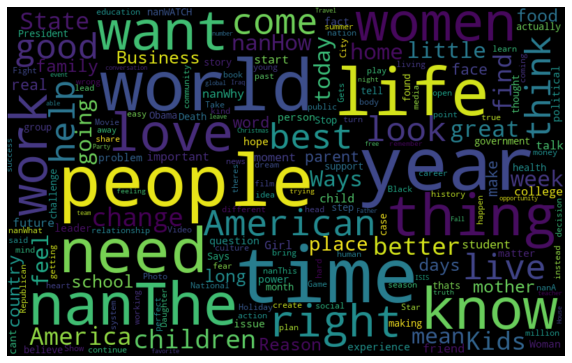

In [10]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### New Categories

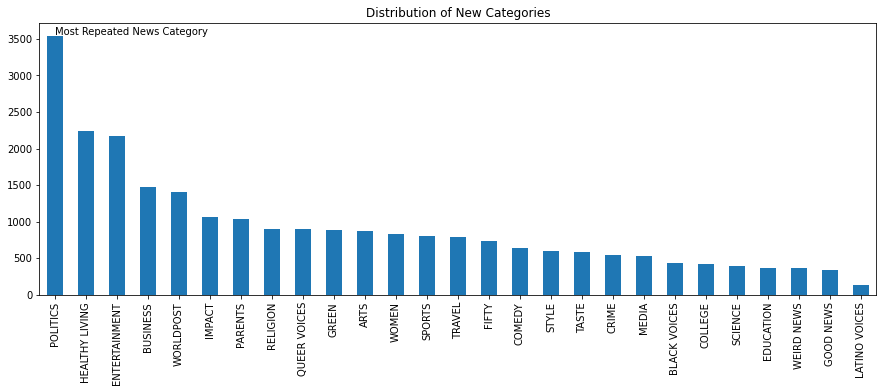

In [11]:
plt.figure(figsize=(15,5))
news_df.category.value_counts().plot(kind="bar")
plt.annotate("Most Repeated News Category",xy=(0,3550))
plt.xticks(rotation=90)
plt.title("Distribution of New Categories");

In [12]:
def text_cleaning(text):
    text=nt.fix_contractions(text)               #I'm -->I am
    text=nt.remove_special_characters(text)      #(),&,<,^...
    text=nt.remove_stopwords(text)               #is,are,the,..
    text=nt.remove_puncts(text)                  #,.:;
    text=nt.remove_bad_quotes(text)              #'b''
    text=nt.remove_emojis(text)                  #emojis
    text=nt.remove_numbers(text)                 #1,2,3,...
    text=nt.remove_shortwords(text,3)            #removing short words of length 3 
    return text

In [13]:
news_df['news_text']=news_df['news_text'].apply(lambda x:text_cleaning(x))

### Lemmatization

In [14]:
# Create a WordNet lemmatizer object
lemmatizer = WordNetLemmatizer()    #convert words to their base words

In [15]:
def text_lemmatization(text):
    # Tokenize the sentence into individual words
    words = nltk.word_tokenize(text)
    # Lemmatize each word in the sentence
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [16]:
news_df['news_text']=news_df['news_text'].apply(lambda x:text_lemmatization(x))

### Text Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer  #text vectorizing using Tfidf vectorizer
vect=TfidfVectorizer(max_features=4000)  #creating object of tfidf vectorizer
X=vect.fit_transform(news_df.news_text)  #vectorizing news_text 

In [18]:
y=news_df['category']   

### Splitting Data into Training and Testing

In [19]:
from sklearn.model_selection import train_test_split  #importing train test split from sklearn

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42,shuffle=True)

+ ==================================================================================================== +
			1-For Support Vector Classifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.4768
--------------------------------------------------
F1 :  [0.41486068 0.17931034 0.49782923 0.44827586 0.19047619 0.45378151
 0.40718563 0.51391586 0.27433628 0.06818182 0.45179063 0.48304581
 0.30653266 0.10810811 0.48484848 0.53892216 0.56144578 0.47094801
 0.48115942 0.31147541 0.53072626 0.48559671 0.52419355 0.54069767
 0.         0.40322581 0.51515152]
--------------------------------------------------
Reacll :  [0.30454545 0.11926606 0.46866485 0.36792453 0.1125     0.39705882
 0.37777778 0.73112339 0.17032967 0.03529412 0.37272727 0.72370766
 0.22761194 0.05882353 0.36363636 0.51724138 0.78983051 0.34222222
 0.36888889 0.19587629 0.47029703 0.39072848 0.44827586 0.47208122
 0.         0.36057

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


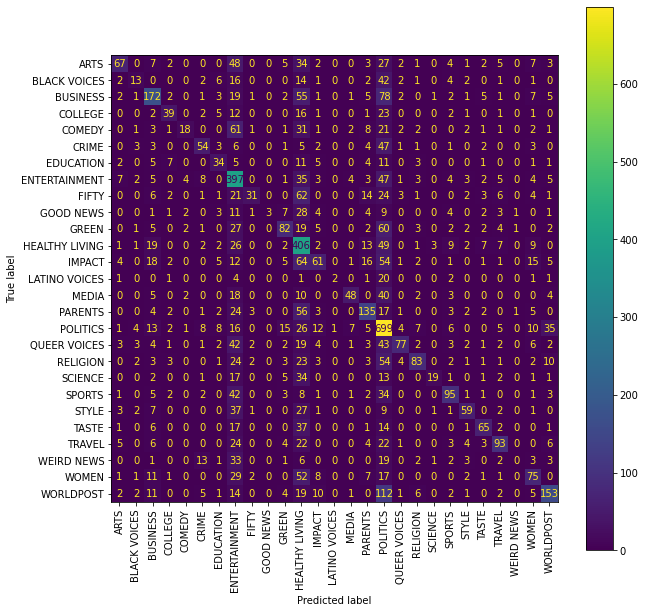

							-----------------------------------------------------------
							 Time for detection (Support Vector Classifier) : 709.16 seconds...
							-----------------------------------------------------------



c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+ ==================================================================================================== +
			2-For LogisitcRegression The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.49456
--------------------------------------------------
F1 :  [0.47507331 0.19178082 0.49662618 0.46590909 0.17346939 0.46351931
 0.37241379 0.52843273 0.32411067 0.08988764 0.49350649 0.50195059
 0.33407572 0.11111111 0.48453608 0.53384913 0.58980785 0.52486188
 0.4929972  0.30769231 0.54166667 0.49805447 0.55686275 0.54748603
 0.12       0.41322314 0.53717754]
--------------------------------------------------
Reacll :  [0.36818182 0.12844037 0.5013624  0.38679245 0.10625    0.39705882
 0.3        0.70165746 0.22527473 0.04705882 0.43181818 0.68805704
 0.27985075 0.05882353 0.35606061 0.52873563 0.79774011 0.42222222
 0.39111111 0.20618557 0.51485149 0.42384106 0.48965517 0.49746193
 0.06666667 0.36057692 0.

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


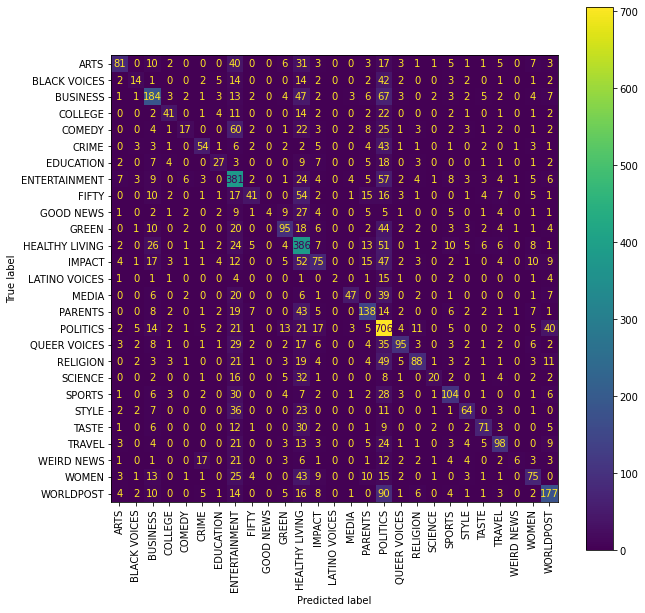

							-----------------------------------------------------------
							 Time for detection (LogisitcRegression) : 40.469 seconds...
							-----------------------------------------------------------



c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

+ ==================================================================================================== +
			3-For NaiveBayesClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.40944
--------------------------------------------------
F1 :  [0.31272727 0.         0.47432024 0.12068966 0.09467456 0.24561404
 0.02150538 0.49313433 0.14141414 0.         0.34228188 0.43397153
 0.20588235 0.         0.14084507 0.42380952 0.51287001 0.37241379
 0.37873754 0.04       0.39716312 0.25       0.48076923 0.43448276
 0.         0.23015873 0.47985989]
--------------------------------------------------
Reacll :  [0.19545455 0.         0.42779292 0.06603774 0.05       0.15441176
 0.01111111 0.76058932 0.07692308 0.         0.23181818 0.78787879
 0.13059701 0.         0.07575758 0.34099617 0.90056497 0.24
 0.25333333 0.02061856 0.27722772 0.15231788 0.34482759 0.31979695
 0.         0.13942308 0.3903

c:\users\zee tech\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


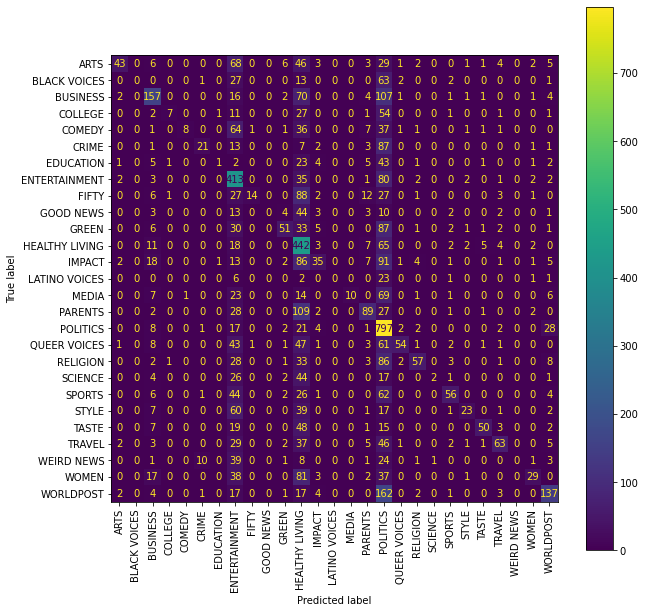

							-----------------------------------------------------------
							 Time for detection (NaiveBayesClassifier) : 5.2 seconds...
							-----------------------------------------------------------



,Model,Accuracy,Precision,Recall,F1_Score,Confusion Matrix
0,Support Vector Classifier,0.47680,"[0.6504854368932039, 0.3611111111111111, 0.530...","[0.30454545454545456, 0.11926605504587157, 0.4...","[0.4148606811145511, 0.1793103448275862, 0.497...","[[67, 0, 7, 2, 0, 0, 0, 48, 0, 0, 5, 34, 2, 0,..."
1,LogisitcRegression,0.49456,"[0.6694214876033058, 0.3783783783783784, 0.491...","[0.36818181818181817, 0.12844036697247707, 0.5...","[0.47507331378299117, 0.1917808219178082, 0.49...","[[81, 0, 10, 2, 0, 0, 0, 40, 0, 0, 6, 31, 3, 0..."
2,NaiveBayesClassifier,0.40944,"[0.7818181818181819, 0.0, 0.5322033898305085, ...","[0.19545454545454546, 0.0, 0.42779291553133514...","[0.31272727272727274, 0.0, 0.47432024169184295...","[[43, 0, 6, 0, 0, 0, 0, 68, 0, 0, 6, 46, 3, 0,..."


In [21]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report, plot_confusion_matrix

# check the performance on diffrent regressor
models = []
models.append(('Support Vector Classifier', svm.SVC()))
models.append(('LogisitcRegression', LogisticRegression()))
models.append(('NaiveBayesClassifier', MultinomialNB()))

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# metrices to store performance
acc = []
pre = []
f1 = []
con = []
rec = []


import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = precision_score(y_test, y_pred, average=None)
    pre.append(precision)
    # Recall
    recall = recall_score(y_test, y_pred, average=None)
    rec.append(recall)
    # F1 Score
    f1_sco = f1_score(y_test, y_pred, average=None)
    f1.append(f1_sco)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)
    
    # evaluate model
    scores = cross_val_score(clf, X, y, cv=cv, n_jobs=-1)



    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('cross validation accuracy : ', np.mean(scores))
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(clf, X_test, y_test,ax=ax)
    plt.xticks(rotation=90)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    
pd.DataFrame({"Model": dict(models).keys(), "Accuracy": acc, "Precision": pre, "Recall": rec, "F1_Score": f1, "Confusion Matrix": con})